# Student Survey Analysis I

Author: Nicholas Czipo

Date: 07/22/2025

## I. Project Overview

The purpose of this project is to analyze non-computing major student survey results at the County College of Morris from the year 2024. All students who take the survey are enrolled in an introductory computing course at the time. The goal is to identify traits among students that best track with a further willingness to take computing courses. More specifically, I will explore the following questions:

*1.) Is there a pattern among the demographics (gender, race/ethnicity, age) of students who are currently enrolled in an introductory computer course? For example, are computing courses most popular with young white males ?*

*2.) Is there an intro to computing class that seems to generate further willingness to take classes in the future more than others?*

*3.) Is there a relationship between student major and a willingness to take more computer science classes. In other words, do some majors tend to display a greater degree of interest in computer science.*

*4.)Is there a type of class students would like to learn more about more than others? Perhpaps AI more than app development, for example.*




## II. Data Cleaning 

We begin our data cleaning by importing the necessary data analysis modules along with the survey results dataset.

In [75]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns

survey_2024 = pd.read_csv("Student Survey Results 2024.csv")

Before we begin any serious data cleaning, let's familiarize ourselves with the dataset.

In [76]:
survey_2024.shape

(92, 71)

We see our data contains 92 records and 71 columns. We can view the first few records by calling `survey_2024.head()`

In [77]:
survey_2024.head()

,Timestamp,Which course are you currently enrolled in?,What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking],What motivated you to seek a computing class at CCM? [To keep current in computing skills],What motivated you to seek a computing class at CCM? [Career Advancement],What motivated you to seek a computing class at CCM? [Career Change],What motivated you to seek a computing class at CCM? [Professional Development],What motivated you to seek a computing class at CCM? [Job Displacement],What motivated you to seek a computing class at CCM? [Relocation],What motivated you to seek a computing class at CCM? [IT Industry Certifications],...,"If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]","If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]",Gender,Race/ethnicity,Age
0,2024/09/10 10:47:35 AM AST,CMP 126 Computer Technology and Applications,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,No,No,No,No,No,No,Prefer not to say,Hispanic or Latino;Black/African American;Whit...,19-20
1,2024/09/10 11:00:05 AM AST,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,No,Yes,Yes,No,No,...,Yes,Yes,Yes,Yes,Yes,No,No,Woman,Hispanic or Latino,19-20
2,2024/09/10 11:02:51 AM AST,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,...,No,Yes,No,Yes,Yes,Yes,Yes,Man,Choose not to reply,18 and younger
3,2024/09/10 11:05:25 AM AST,CMP 126 Computer Technology and Applications,No,Yes,No,No,No,No,No,No,...,No,No,Yes,No,No,Yes,No,Man,Hispanic or Latino,19-20
4,2024/09/10 8:37:36 PM AST,CMP 101 Computer Information Literacy,Yes,Yes,Yes,No,Yes,No,No,No,...,No,No,No,No,No,No,No,Woman,White/Caucasian,19-20


The above only returns a handful of the 71 columns. Note that several columns pertain to the different replies a student may choose for an individual question. For example, consider the question: *What motivated you to seek a computing course at CCM?*

In response, a student may select the following: it's a required class, to keep current in computing skills, career advancement, career change, professional development, job displacement, CCM relocation, IT industry certifications. Therefore, nine columns are dedicated to one question. 

Let's begin our data cleaning by first checking for duplicate rows. Then we can delete the columns we won't be using.

In [78]:
survey_2024.drop_duplicates(keep = "first", inplace = True)
survey_2024.shape

(92, 71)

As we can see by `survey_2024.shape`, there are no duplicates.

The following code will drop the timestap column along with the columns pertaining to the questions:


*Prior applying to college, did you participate in any of the following events at CCM and/or with the Department of Information Technologies?*

*To what extent did the following activities or experience impact your decision to enroll in a computing class at CCM?*

*How did you hear about CCM?*

*To what extent did the following impact your decision to attent CCM?*

In [79]:
drop0 = [0]
drop1 = [i for i in range(13,52)]
drop2 = [i for i in range(53,59)]
to_drop = drop0 + drop1 + drop2
survey_2024 = survey_2024.drop(survey_2024.columns[to_drop], axis = 1)

Now lets review the shape of our updated dataset.

In [80]:
survey_2024.shape

(92, 25)

We now have 25 columns instead of 71. Let's rename the columns for increased simplicity.

In [81]:
survey_2024 = survey_2024.rename(columns = {
                                                survey_2024.columns[0]: "currently_enrolled", 
                                                survey_2024.columns[1]: "motivation_required",
                                                survey_2024.columns[2]: "motivation_keepCurrent",
                                                survey_2024.columns[3]: "motivation_careerAdvancement",
                                                survey_2024.columns[4]: "motivation_careerChange",
                                                survey_2024.columns[5]: "motivation_development",
                                                survey_2024.columns[6]: "motivation_jobDisplace",
                                                survey_2024.columns[7]: "motivation_relocation",
                                                survey_2024.columns[8]: "motivation_certification",
                                                survey_2024.columns[9]: "motivation_financial",
                                                survey_2024.columns[10]: "motivation_enrichment",
                                                survey_2024.columns[11]: "motivation_curiosity",
                                                survey_2024.columns[12]: "major",
                                                survey_2024.columns[13]: "future_interest",
                                                survey_2024.columns[14]: "class_webDevelopment",
                                                survey_2024.columns[15]: "class_cyberSecurity",
                                                survey_2024.columns[16]: "class_appDevelopment",
                                                survey_2024.columns[17]: "class_dataAnalytics",
                                                survey_2024.columns[18]: "class_AI",
                                                survey_2024.columns[19]: "class_programming",
                                                survey_2024.columns[20]: "class_gameDesign",
                                                survey_2024.columns[21]: "class_hardware",
                                                survey_2024.columns[22]: "gender",
                                                survey_2024.columns[23]: "race_or_ethnicity",
                                                survey_2024.columns[24]: "age"
                                           }
                                  )

Calling `survey_2024.head()` displays our refined dataset

In [82]:
survey_2024.head()

,currently_enrolled,motivation_required,motivation_keepCurrent,motivation_careerAdvancement,motivation_careerChange,motivation_development,motivation_jobDisplace,motivation_relocation,motivation_certification,motivation_financial,...,class_cyberSecurity,class_appDevelopment,class_dataAnalytics,class_AI,class_programming,class_gameDesign,class_hardware,gender,race_or_ethnicity,age
0,CMP 126 Computer Technology and Applications,No,Yes,Yes,Yes,Yes,No,No,No,Yes,...,Yes,No,No,No,No,No,No,Prefer not to say,Hispanic or Latino;Black/African American;Whit...,19-20
1,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,...,Yes,Yes,Yes,Yes,Yes,No,No,Woman,Hispanic or Latino,19-20
2,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,No,Yes,No,Yes,Yes,Yes,Yes,Man,Choose not to reply,18 and younger
3,CMP 126 Computer Technology and Applications,No,Yes,No,No,No,No,No,No,No,...,No,No,Yes,No,No,Yes,No,Man,Hispanic or Latino,19-20
4,CMP 101 Computer Information Literacy,Yes,Yes,Yes,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,Woman,White/Caucasian,19-20


Having pared down our dataset, let's check for any null values.

In [83]:
survey_2024.isnull().sum()

currently_enrolled              0
motivation_required             0
motivation_keepCurrent          0
motivation_careerAdvancement    0
motivation_careerChange         0
motivation_development          0
motivation_jobDisplace          0
motivation_relocation           0
motivation_certification        0
motivation_financial            0
motivation_enrichment           0
motivation_curiosity            0
major                           0
future_interest                 0
class_webDevelopment            0
class_cyberSecurity             0
class_appDevelopment            0
class_dataAnalytics             0
class_AI                        0
class_programming               0
class_gameDesign                0
class_hardware                  0
gender                          0
race_or_ethnicity               0
age                             0
dtype: int64

`survey_2024.isnull().sum()` finds the total amout of null values in each column. This dataset does not contain any null values. 

Via visual inspection, the major and race/ethnicity columns contain values that can be further condensed. 
Beginning with the majors column, let's see the number of unique values.

In [84]:
survey_2024["major"].value_counts()

major
Radiography                                           26
Liberal Arts                                          18
Nursing                                                9
Criminal Justice                                       5
Child and Family Studies                               5
Exercise Science                                       4
Broadcasting Arts and Technology                       3
Not in a degree program                                3
Engineering Science                                    3
Early Childhood Education                              3
child psychology                                       1
analyst                                                1
Journalism                                             1
Psychology                                             1
Music Technology                                       1
Nursing, but not at CCM - I am a visiting student      1
Biology                                                1
History Education        

The survey provides the following options for majors: Broadcasting Arts and Technology, Child and Family Studies, Communication, Criminal Justice, Early Childhood Education, Excercise Science, Journalism, Libeeral Arts, Music Technology, Nursing, Public Administration, Public Health, Radiology, Theatre Technology and Not in a Degree Program. 

I will maintain these original catergories with a few caveats. To begin, I will add a category for engineering science. Next, I will also consolidate different biology, psychology, nursing, child and family studies and music related majors into their own respective categories(e.g. Musical Theatre and Music Education will be grouped under the new category Music Education). In addition, I will also group any remaing disparate majors under a category called Other. 

First, let's group the different biology, nursing, psychology, childhood education and music education majors into their own respective categories using regular expressions. 



In [85]:
majors = survey_2024["major"]
majors.replace(".*[Bb]iology.*", "Biology", regex = True, inplace = True)
majors.replace(".*[Pp]sychology.*", "Psychology", regex = True, inplace = True)
majors.replace(".*[Nn]ursing.*", "Nursing", regex = True, inplace = True)
majors.replace(".*[Cc]hild.*", "Child and Family Studies", regex = True, inplace = True)
majors.replace(".*[Mm]usic.*", "Music Education", regex = True, inplace = True)
survey_2024["majors"] = majors
survey_2024["majors"].value_counts()


majors
Radiography                         26
Liberal Arts                        18
Nursing                             10
Child and Family Studies             8
Criminal Justice                     5
Exercise Science                     4
Not in a degree program              3
Broadcasting Arts and Technology     3
Engineering Science                  3
Psychology                           2
Music Education                      2
Biology                              2
analyst                              1
Journalism                           1
Culinary Arts and Sciences           1
History Education                    1
Communication                        1
Fire Science                         1
Name: count, dtype: int64

Now let's group any miscellaneuous majors into an Other category. 

In [86]:
majors_list = ["Broadcasting Arts and Technology", "Child and Family Studies", "Communication", 
               "Criminal Justice", "Exercise Science", "Journalism", 
               "Liberal Arts", "Nursing", "Public Administration", "Public Health", "Radiography", 
               "Theatre Technology", "Engineering Science", "Psychology", "Biology", "Music Education",  "Not in a degree program"]

survey_2024["major"] = survey_2024["major"].apply(lambda x: "Other" if x not in majors_list else x)


In [87]:
survey_2024["major"].value_counts()


major
Radiography                         26
Liberal Arts                        18
Nursing                             10
Child and Family Studies             8
Criminal Justice                     5
Other                                4
Exercise Science                     4
Not in a degree program              3
Engineering Science                  3
Broadcasting Arts and Technology     3
Psychology                           2
Biology                              2
Music Education                      2
Journalism                           1
Communication                        1
Name: count, dtype: int64

Having cleaned up the majors column, we can move on to the race/ethncity column.

In [88]:
survey_2024["race_or_ethnicity"].value_counts()

race_or_ethnicity
White/Caucasian                                                           36
Hispanic or Latino                                                        26
Hispanic or Latino;White/Caucasian                                         7
Black/African American                                                     6
Choose not to reply                                                        5
Asian;White/Caucasian                                                      3
Asian                                                                      3
Hispanic or Latino;Black/African American                                  1
Hispanic or Latino;Black/African American;White/Caucasian;Multi-Racial     1
Asian;Black/African American                                               1
American Indian/Native American/Alaska Native;White/Caucasian              1
Hispanic or Latino;White/Caucasian;Multi-Racial                            1
Hispanic or Latino;Asian;White/Caucasian                  

For this column, I will change any reply that contains more than one selection(e.g. Asian; African American) into a Mixed Race category. I will also change the "Choose not to reply" responses to "Unknown".

In [89]:
race_ethnicity = survey_2024["race_or_ethnicity"]
race_ethnicity.replace("Choose not to reply", "Unknown", regex = True, inplace = True)

In [90]:
race_ethnicity.value_counts()

race_or_ethnicity
White/Caucasian                                                           36
Hispanic or Latino                                                        26
Hispanic or Latino;White/Caucasian                                         7
Black/African American                                                     6
Unknown                                                                    5
Asian;White/Caucasian                                                      3
Asian                                                                      3
Hispanic or Latino;Black/African American                                  1
Hispanic or Latino;Black/African American;White/Caucasian;Multi-Racial     1
Asian;Black/African American                                               1
American Indian/Native American/Alaska Native;White/Caucasian              1
Hispanic or Latino;White/Caucasian;Multi-Racial                            1
Hispanic or Latino;Asian;White/Caucasian                  

In [91]:
race_ethnicity.replace(".*;.*", "Mixed", regex = True, inplace = True)

In [92]:
race_ethnicity.value_counts()

race_or_ethnicity
White/Caucasian           36
Hispanic or Latino        26
Mixed                     16
Black/African American     6
Unknown                    5
Asian                      3
Name: count, dtype: int64

Having completed our data cleaning, I will save our cleaned data as a new csv file. 

In [93]:
survey_2024.to_csv("Student Survey Results 2024 Cleaned.csv", index = False)

## III. Data Exploration

### Student Demographics

To begin our data exploration, let's take a look at the demographics of students currently enrolled in an introductory computing course. This will help us address question 1 posed in the Project Overview section.

In [94]:
survey_2024['gender'].value_counts()

gender
Woman                60
Man                  29
Prefer not to say     2
Non-binary            1
Name: count, dtype: int64

In [95]:
survey_2024["race_or_ethnicity"].value_counts()

race_or_ethnicity
White/Caucasian           36
Hispanic or Latino        26
Mixed                     16
Black/African American     6
Unknown                    5
Asian                      3
Name: count, dtype: int64

In [96]:
survey_2024['age'].value_counts()

age
19-20             44
21-24             17
18 and younger    14
25-34             11
35-64              6
Name: count, dtype: int64

At first glance, we can see woman greatly outnumber the amount of men currently enrolled in an introductory computing course. For race/ethincity, white/caucasion takes the lead followed by hispanic/latino. The results for age are unsurprising with the 19-20 age bracket predominating. 

Let's take a closer look at the breakdown of some of these demographics.


In [97]:
survey_2024.groupby(["race_or_ethnicity"])["gender"].apply(lambda x: (x == "Woman").sum())

race_or_ethnicity
Asian                      2
Black/African American     4
Hispanic or Latino        21
Mixed                     11
Unknown                    3
White/Caucasian           19
Name: gender, dtype: int64

In [98]:
survey_2024.groupby(["race_or_ethnicity"])["gender"].apply(lambda x: (x == "Man").sum())

race_or_ethnicity
Asian                      1
Black/African American     2
Hispanic or Latino         5
Mixed                      4
Unknown                    2
White/Caucasian           15
Name: gender, dtype: int64

The above tables give a breakdown of gender by race/ethnicity. For females, most are hispanic/latina. For men, white/caucasion is most prevelent. Let's do the same for age.


In [99]:
survey_2024.groupby(["age"])["gender"].apply(lambda x: (x == "Woman").sum())

age
18 and younger    10
19-20             27
21-24             14
25-34              7
35-64              2
Name: gender, dtype: int64

In [100]:
survey_2024.groupby(["age"])["gender"].apply(lambda x: (x == "Man").sum())

age
18 and younger     3
19-20             15
21-24              3
25-34              4
35-64              4
Name: gender, dtype: int64

The 19-20 age bracket is highest for both genders. 

Therefore, in terms of gender, hispanic/latina women within the 19-20 age bracket appear most prevelant while for males, white/caucasions of the age 19-20 are most common. 

Let's create some bar charts to help vizualize some of the above findings. 


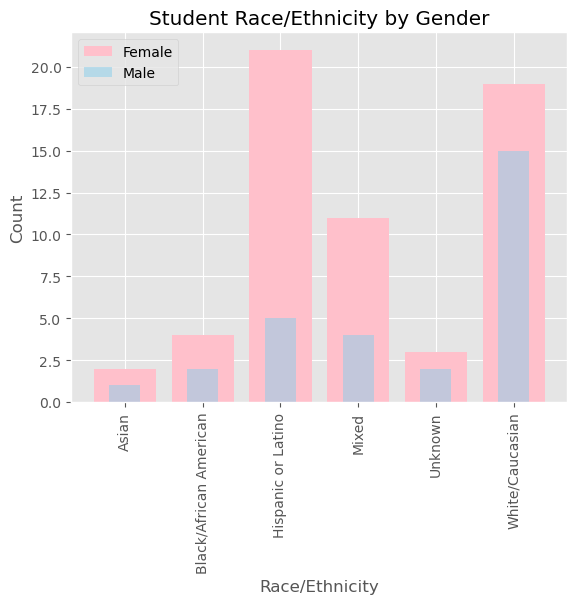

In [101]:
categories_re = ["Asian", "Black/African American", "Hispanic or Latino", "Mixed", "Unknown", "White/Caucasian"]
x = np.arange(len(categories_re))

female_re = survey_2024.groupby(["race_or_ethnicity"])["gender"].apply(lambda x: (x == "Woman").sum()).tolist()
male_re = survey_2024.groupby(["race_or_ethnicity"])["gender"].apply(lambda x: (x == "Man").sum()).tolist()

plt.bar(x, female_re, width = 0.8, color = "pink", label = "Female")
plt.bar(x, male_re, width = 0.4, color = "skyblue", alpha = 0.5, label = "Male")
plt.title("Student Race/Ethnicity by Gender")
plt.xlabel("Race/Ethnicity")
plt.xticks(x, categories_re, rotation = "vertical")
plt.ylabel("Count")
plt.legend()
style.use("ggplot")
plt.show()

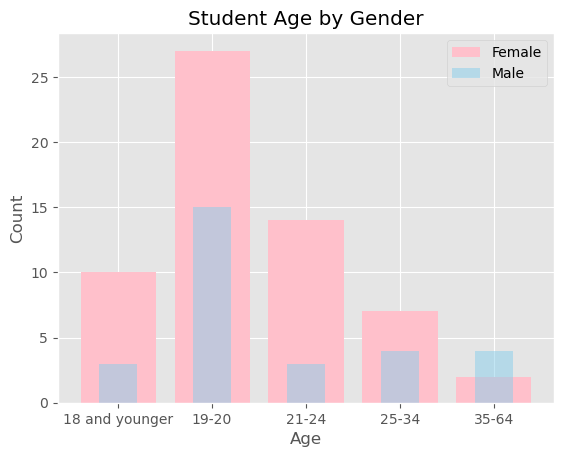

In [102]:
categories_age = ["18 and younger", "19-20", "21-24", "25-34", "35-64"]
x = np.arange(len(categories_age))

female_age = survey_2024.groupby(["age"])["gender"].apply(lambda x: (x == "Woman").sum()).tolist()
male_age = survey_2024.groupby(["age"])["gender"].apply(lambda x: (x == "Man").sum()).tolist()

plt.bar(x, female_age, width = 0.8, color = "pink", label = "Female")
plt.bar(x, male_age, width = 0.4, color = "skyblue", alpha = 0.5, label = "Male")
plt.title("Student Age by Gender")
plt.xlabel("Age")
plt.xticks(x, categories_age, rotation = "horizontal")
plt.ylabel("Count")
plt.legend()
style.use("ggplot")
plt.show()

From the overlaid bard charts above, our initial observations from the pivot tables are confirmed. For race/ethnicity, we could also say that the female distribution is bimodal whereas for men it is unimodal. For age, both male and female distributions are unimodal. 

*What can we say about the demographic makeup of students taking introductory courses at CCM?*

**In general, females make up a larger share of students taking an introductory computing course. Among females, the hispanic/latina grouping makes up the largest share with caucasian as a close second. Most are of the age between 19-20. As for males, the large majority are caucasions between the ages of 19-20.**



Before moving on, let's take a quick look at how both men and women replied to the future interest question. This will play a role in our logistic regression model later on. 

In [103]:
survey_2024.groupby(["gender"])["future_interest"].apply(lambda x: (x >= 3).sum())

gender
Man                  17
Non-binary            0
Prefer not to say     0
Woman                31
Name: future_interest, dtype: int64

Out of the 60 women, about half recorded a value of 3 or higher while out of 29 men, 17 did the same.

### Computing Classes and Further Interest 

We will now analyze the interplay between introductory computing classes, student major and an indicated desire to take more computing classes in the future.  

Let's first take a look at the distribution of intro to computing classes.

In [104]:
survey_2024["currently_enrolled"].value_counts()

currently_enrolled
CMP 135 Computer Concepts with Applications     40
CMP 126 Computer Technology and Applications    30
CMP 101 Computer Information Literacy           22
Name: count, dtype: int64

As we can see, computer concepts with Applications is the favorite class to take. Yet, as stated in question two in the Project Overview Section, it would be interesting to know if either of the three courses listed above have a greater percentage of students who indicate a willingness to take further computing courses.


In [105]:
interest = survey_2024[survey_2024["future_interest"] >= 3]
interest["currently_enrolled"].value_counts()



currently_enrolled
CMP 101 Computer Information Literacy           17
CMP 126 Computer Technology and Applications    16
CMP 135 Computer Concepts with Applications     15
Name: count, dtype: int64

I created a new dataset and excluded any values under the future_interest column that were less than 3 (interest is measured from 1-5 with 5 indicating high future interest). I then called `interest["currently_enrolled"].value_counts()` to get the updated counts. Let's get the ratio of these values.



In [106]:
x = interest["currently_enrolled"].value_counts()
y = survey_2024["currently_enrolled"].value_counts()

print(f"Computer Information Literacy: {x.iloc[0]/y.iloc[0]:.2f}\n" +
      f"Computer Technology and Applications: {x.iloc[1]/y.iloc[1]:.2f}\n" +
      f"Computer Concepts with Applications: {x.iloc[2]/y.iloc[2]:.2f}\n")
      



Computer Information Literacy: 0.42
Computer Technology and Applications: 0.53
Computer Concepts with Applications: 0.68



**Therefore, Computer Concepts with Applications corresponds with the greatest proportion of students who indicate a further willingess to take computing classes in the future. Note that this does not say that this class is a powerful explanatory variable for further interst. It is simply an interesting observation.**

### Student Major and Further Interest

Let's now take a look at which student majors display a higher interest in further computer courses.
To begin, I'll recall the `value_counts()` method for student major.

In [107]:
survey_2024["major"].value_counts()

major
Radiography                         26
Liberal Arts                        18
Nursing                             10
Child and Family Studies             8
Criminal Justice                     5
Other                                4
Exercise Science                     4
Not in a degree program              3
Engineering Science                  3
Broadcasting Arts and Technology     3
Psychology                           2
Biology                              2
Music Education                      2
Journalism                           1
Communication                        1
Name: count, dtype: int64

To better visualize the distribution of majors, let's create a pie chart.

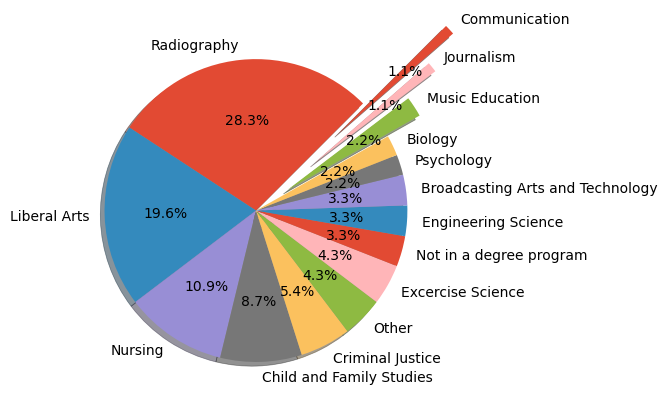

In [108]:
major_counts = survey_2024["major"].value_counts().tolist()
total = sum(survey_2024["major"].value_counts().tolist())
slices = [x/total for x in major_counts]

labels = ["Radiography", "Liberal Arts", "Nursing", "Child and Family Studies", "Criminal Justice", "Other", 
          "Excercise Science", "Not in a degree program", "Engineering Science", "Broadcasting Arts and Technology",
          "Psychology", "Biology", "Music Education", "Journalism", "Communication"]
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0.25,0.5,0.75]
plt.pie(slices, labels = labels, autopct = "%.1f%%", explode = explode, shadow = True, startangle = 45)
plt.axis("equal")
plt.show()

As we can see, radiography, liberal arts and nursing make up a large share of the pie. I "exploded" commincation, journalism and music education majors simply to make the chart a more readable.

Now let's get a count of majors who indicate  

In [109]:
survey_2024.groupby(["major"])["future_interest"].apply(lambda x: (x >= 3).sum())

major
Biology                              2
Broadcasting Arts and Technology     1
Child and Family Studies             4
Communication                        0
Criminal Justice                     4
Engineering Science                  0
Exercise Science                     2
Journalism                           1
Liberal Arts                         9
Music Education                      0
Not in a degree program              2
Nursing                              7
Other                                2
Psychology                           2
Radiography                         12
Name: future_interest, dtype: int64

Once again getting the ratio's, we have:

In [110]:
x = survey_2024.groupby(["major"])["future_interest"].apply(lambda x: (x >= 3).sum()).sort_index()
y = survey_2024["major"].value_counts().sort_index()

print(f"Biology: {x.iloc[0]/y.iloc[0]:.2f}\n" +
      f"Broadcasting Arts and Technology: {x.iloc[1]/y.iloc[1]:.2f}\n" +
      f"Child and Family Studies: {x.iloc[2]/y.iloc[2]:.2f}\n" +
      f"Communication: {x.iloc[3]/y.iloc[3]:.2f}\n" +
      f"Criminal Justice: {x.iloc[4]/y.iloc[4]:.2f}\n" +
      f"Engineering Science: {x.iloc[5]/y.iloc[5]:.2f}\n" +
      f"Exercise Science: {x.iloc[6]/y.iloc[6]:.2f}\n" +
      f"Journalism: {x.iloc[7]/y.iloc[7]:.2f}\n" +
      f"Liberal Arts: {x.iloc[8]/y.iloc[8]:.2f}\n" +
      f"Music Education: {x.iloc[9]/y.iloc[9]:.2f}\n" +
      f"Not in a degree program: {x.iloc[10]/y.iloc[10]:.2f}\n" +
      f"Nursing: {x.iloc[11]/y.iloc[11]:.2f}\n" +
      f"Other: {x.iloc[12]/y.iloc[12]:.2f}\n" +
      f"Psychology: {x.iloc[13]/y.iloc[13]:.2f}\n"
      f"Radiography: {x.iloc[14]/y.iloc[14]:.2f}\n")

    

Biology: 1.00
Broadcasting Arts and Technology: 0.33
Child and Family Studies: 0.50
Communication: 0.00
Criminal Justice: 0.80
Engineering Science: 0.00
Exercise Science: 0.50
Journalism: 1.00
Liberal Arts: 0.50
Music Education: 0.00
Not in a degree program: 0.67
Nursing: 0.70
Other: 0.50
Psychology: 1.00
Radiography: 0.46



The results are somewhat ambiguous. Biology and Pyschology both have a value of 1, although given each major only contains 2 obvservations, this isn't too helpful. The same can be said for the comminication, engineering science and music education majors. All have values of 0 but their observation counts(1,3,2 respectively) are all quite small. Half of all liberal arts majors indicated a degree of interest in taking future computer courses while a little under half for radiography. 

It is interesting to note that if I set a more stringent parameter for future_interest (by considering only values of 4 or higher) the numbers drop precipitously as evidenced below.


In [111]:
x = survey_2024.groupby(["major"])["future_interest"].apply(lambda x: (x >= 4).sum()).sort_index()
y = survey_2024["major"].value_counts().sort_index()

print(f"Biology: {x.iloc[0]/y.iloc[0]:.2f}\n" +
      f"Broadcasting Arts and Technology: {x.iloc[1]/y.iloc[1]:.2f}\n" +
      f"Child and Family Studies: {x.iloc[2]/y.iloc[2]:.2f}\n" +
      f"Communication: {x.iloc[3]/y.iloc[3]:.2f}\n" +
      f"Criminal Justice: {x.iloc[4]/y.iloc[4]:.2f}\n" +
      f"Engineering Science: {x.iloc[5]/y.iloc[5]:.2f}\n" +
      f"Exercise Science: {x.iloc[6]/y.iloc[6]:.2f}\n" +
      f"Journalism: {x.iloc[7]/y.iloc[7]:.2f}\n" +
      f"Liberal Arts: {x.iloc[8]/y.iloc[8]:.2f}\n" +
      f"Music Education: {x.iloc[9]/y.iloc[9]:.2f}\n" +
      f"Not in a degree program: {x.iloc[10]/y.iloc[10]:.2f}\n" +
      f"Nursing: {x.iloc[11]/y.iloc[11]:.2f}\n" +
      f"Other: {x.iloc[12]/y.iloc[12]:.2f}\n" +
      f"Psychology: {x.iloc[13]/y.iloc[13]:.2f}\n"
      f"Radiography: {x.iloc[14]/y.iloc[14]:.2f}\n")

    

Biology: 0.50
Broadcasting Arts and Technology: 0.33
Child and Family Studies: 0.25
Communication: 0.00
Criminal Justice: 0.20
Engineering Science: 0.00
Exercise Science: 0.00
Journalism: 0.00
Liberal Arts: 0.00
Music Education: 0.00
Not in a degree program: 0.00
Nursing: 0.20
Other: 0.00
Psychology: 0.00
Radiography: 0.27



**Therefore, at first glance, any type of relationship between student major and a further willingess to take computing courses appears inconclusive. By adjusting the interest parameter between three and four, however, we can see that across the board, interest in future computing classes is lukewarm at best. For example, half of liberal arts majors indicated some degree of interest whereas none recorded a strong interest (a value of four or greater).**

### Future Interest and Class Preference

Is there a future class that student tend to prefer? Perhpas cybersecurity? Or maybe app development? Let's get a feel for which class is most popular.


In [112]:
survey_2024["class_cyberSecurity"].value_counts()


class_cyberSecurity
No     61
Yes    31
Name: count, dtype: int64

In [113]:
survey_2024["class_webDevelopment"].value_counts()


class_webDevelopment
No     70
Yes    22
Name: count, dtype: int64

In [114]:
survey_2024["class_appDevelopment"].value_counts()


class_appDevelopment
No     68
Yes    24
Name: count, dtype: int64

In [115]:
survey_2024["class_dataAnalytics"].value_counts()

class_dataAnalytics
No     71
Yes    21
Name: count, dtype: int64

In [116]:
survey_2024["class_AI"].value_counts()

class_AI
No     64
Yes    28
Name: count, dtype: int64

In [117]:
survey_2024["class_programming"].value_counts()

class_programming
No     70
Yes    22
Name: count, dtype: int64

In [118]:
survey_2024["class_gameDesign"].value_counts()

class_gameDesign
No     64
Yes    28
Name: count, dtype: int64

In [119]:
survey_2024["class_hardware"].value_counts()

class_hardware
No     70
Yes    22
Name: count, dtype: int64

Oddly enough, there isn't much notable variation between each class. Cybersecurity seems to attract the most interest but only marginally while data analytics appears to be of least interest. These numbers are from the entire student survey. Let's pare down the data set to those who indicated an interest in computing and look again. I will be using the datafram interest created earlier which only contains interest values of 3 or greater.

In [120]:
interest["class_cyberSecurity"].value_counts()

class_cyberSecurity
Yes    26
No     22
Name: count, dtype: int64

In [121]:
interest["class_appDevelopment"].value_counts()

class_appDevelopment
No     28
Yes    20
Name: count, dtype: int64

In [122]:
interest["class_webDevelopment"].value_counts()

class_webDevelopment
No     32
Yes    16
Name: count, dtype: int64

In [123]:
interest["class_dataAnalytics"].value_counts()

class_dataAnalytics
No     33
Yes    15
Name: count, dtype: int64

In [124]:
interest["class_AI"].value_counts()

class_AI
No     26
Yes    22
Name: count, dtype: int64

In [125]:
interest["class_programming"].value_counts()

class_programming
No     30
Yes    18
Name: count, dtype: int64

In [126]:
interest["class_gameDesign"].value_counts()

class_gameDesign
No     26
Yes    22
Name: count, dtype: int64

In [127]:
interest["class_hardware"].value_counts()

class_hardware
No     30
Yes    18
Name: count, dtype: int64

Again, cybersecurity attracts the most interest but only marginally. Data analytics attracts the least. Similar to our first look, there isn't any one class that truly stands out amongst the rest, regargless of student interest.

**Therefore, it appears that regardless of student interest in taking future computer classes, students tend to choose cybersecurity as the most interesting and data analytics as least. These differences, however, are only marginal and there is no clear cut winner where interest in one class is far greater than any other.**


## IV. Conclusion 

This project has sought to analyze the relationship between student demographics and a desire to take further computer courses in the future.

It looked at how age, race/ethncity and gender varied by the various introductory computer courses available along with which of this courses seemed to retain the largest amount of student interest. It also examined the composition of student majors and how interest in computer courses varied among different fields of study. Lastly, it took a look at which computer related courses appeared to generate the most interest both amongst the students as a whole and among those that expressed a desire to take further courses in the future.

The analysis yeielded both interesting and underwhelming results and could benefit from a quantification of the relationships examined above. In other words, it would be interesting to put a number on just how stong gender or the class a student is currently enrolled in predicts a future interest in computing courses. An ordinal logistic regression model or even just a logistic regression model where future interest is binned into a binary value  could be emplyed to quanitfy the predictive power of some of the variables mentioned above. 


## IV. Citations

Deitel, Paul J., and Harvey M. Deitel. Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud. Pearson, 2020. 

Lee, Wei-Meng. Python Machine Learning. Wiley, 2019. 

Lerner, Reuven, director. Finding Text Patterns in Pandas with Regular Expressions. Python and Pandas with Reuven Lerner, https://www.youtube.com/watch?v=hiJDlvKDy0o  